# Sistemas Inteligentes para Bioinformática

In [1]:
from si.data.dataset import Dataset, summary
import os

In [2]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/breast-bin.data')

## Labeled dataset

In [3]:
dataset = Dataset.from_data(filename, labeled=True)

In [4]:
dataset.X[:5, :]

array([[8., 4., 4., 1., 2., 9., 3., 3., 1.],
       [5., 1., 1., 3., 2., 1., 1., 1., 1.],
       [2., 1., 1., 1., 3., 1., 2., 1., 1.],
       [2., 1., 1., 1., 2., 1., 3., 1., 1.],
       [9., 5., 8., 1., 2., 3., 2., 1., 5.]])

In [5]:
dataset.Y[:5]

array([1., 0., 0., 0., 1.])

In [6]:
print("Has label:", dataset.hasLabel())
print("Number of features:", dataset.getNumFeatures())
print("Number of classes:", dataset.getNumClasses())
summary(dataset)

Has label: True
Number of features: 9
Number of classes: 2


,A,B,C,D,E,F,G,H,I,Y
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,0.344778
var,7.917053,9.298082,8.819630,8.141527,4.896110,13.099601,5.937114,9.311340,2.937284,0.225906
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [7]:
dataset.toDataframe()

,A,B,C,D,E,F,G,H,I,Y
0,8.0,4.0,4.0,1.0,2.0,9.0,3.0,3.0,1.0,1.0
1,5.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
2,2.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,0.0
3,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
4,9.0,5.0,8.0,1.0,2.0,3.0,2.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...
694,1.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,0.0
695,5.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0
696,5.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
697,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,0.0


## Standard Scaler

In [8]:
from si.util.scale import StandardScaler
sc = StandardScaler()
ds2 = sc.fit_transform(dataset)
summary(ds2)

,A,B,C,D,E,F,G,H,I,Y
mean,-3.811925e-17,-1.219816e-16,-6.607336e-17,9.148619e-17,6.607336e-17,-5.082566e-17,5.082566e-18,-8.386234e-17,-5.717887e-17,0.344778
var,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.225906
max,1.983939e+00,2.251526e+00,2.287222e+00,2.520955e+00,3.065906e+00,1.799664e+00,2.693171e+00,2.337594e+00,4.907421e+00,1.000000
min,-1.214667e+00,-6.999951e-01,-7.432990e-01,-6.332472e-01,-1.001495e+00,-6.869792e-01,-1.000471e+00,-6.118250e-01,-3.439118e-01,0.000000


# Feature Selection

In [9]:
from si.data.feature_selection import SelectKBest, VarianceThreshold

## Variance Threshold

In [10]:
vt = VarianceThreshold(8)
ds2 = vt.fit_transform(dataset)
summary(ds2)

,B,C,D,F,H,Y
mean,3.134478,3.207439,2.806867,3.486409,2.866953,0.344778
var,9.298082,8.819630,8.141527,13.099601,9.311340,0.225906
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


## SelectKBest

In [11]:
# SelectKBest for classification
skb = SelectKBest(5)
ds3 = skb.fit_transform(dataset)
summary(ds3)


,A,G,B,C,F,Y
mean,4.417740,3.437768,3.134478,3.207439,3.486409,0.344778
var,7.917053,5.937114,9.298082,8.819630,13.099601,0.225906
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


# Clustering

In [12]:
from si.unsupervised.clustering import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df,ylabel="class")

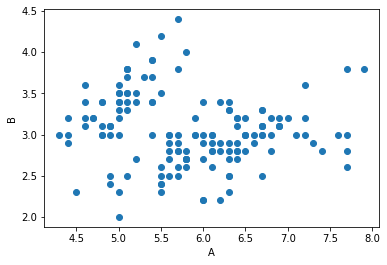

In [14]:
# indice das features para o plot
c1 = 0
c2 = 1
# plot
plt.scatter(iris.X[:,c1], iris.X[:,c2])
plt.xlabel(iris.xnames[c1])
plt.ylabel(iris.xnames[c2])
plt.show()

In [15]:
kmeans = KMeans(3, n_iter=2)
cent, clust = kmeans.fit_transform(iris)

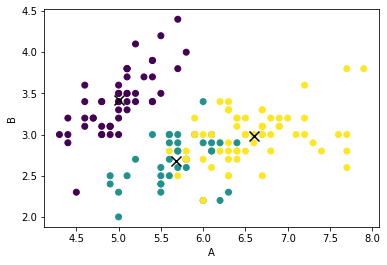

In [16]:

plt.scatter(iris.X[:,c1], iris.X[:,c2],c=clust)
plt.scatter(cent[:,c1],cent[:,c2], s = 100, c = 'black',marker='x')
plt.xlabel(iris.xnames[c1])
plt.ylabel(iris.xnames[c2])
plt.show()

# PCA

In [17]:
from si.unsupervised.clustering import PCA
pca = PCA(2, method='svd')

In [18]:
reduced = pca.fit_transform(iris)[0]
print(pca.explained_variances())

[53.42728505 30.05643531 12.02085822  4.49542143]


In [19]:
iris_pca = Dataset(reduced,iris.Y,xnames=['pc1','pc2'],yname='class')
iris_pca.toDataframe()

,pc1,pc2,class
0,2.264542,-0.505704,Iris-setosa
1,2.086426,0.655405,Iris-setosa
2,2.36795,0.318477,Iris-setosa
3,2.304197,0.575368,Iris-setosa
4,2.388777,-0.674767,Iris-setosa
...,...,...,...
145,-1.870522,-0.382822,Iris-virginica
146,-1.558492,0.905314,Iris-virginica
147,-1.520845,-0.266795,Iris-virginica
148,-1.376391,-1.016362,Iris-virginica


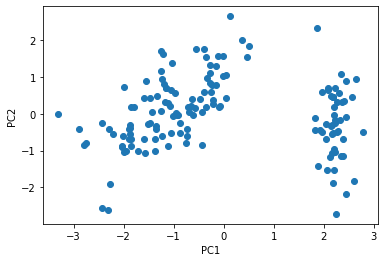

In [20]:
plt.scatter(iris_pca.X[:,0], iris_pca.X[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# KNN

In [21]:
from src.si.supervised.knn import KNN
knn = KNN(3)

In [22]:
knn.fit(iris)

idx = 50
x = iris.X[idx, :]
pred = knn.predict(x)

In [23]:
print(f'Prediction: {pred}')
print(f'True: {iris.Y[idx]}')
print(knn.cost())

Prediction: Iris-versicolor
True: Iris-versicolor
0.96


# Naive Bayes

In [24]:
from src.si.supervised.nb import Naive_bayes
nb = Naive_bayes()

In [25]:
nb.fit(iris)

idx = 50
x = iris.X[idx, :]
pred = nb.predict(x)

In [26]:
print(f'Prediction: {pred}')
print(f'True: {iris.Y[idx]}')
print(nb.cost())


Prediction: Iris-versicolor
True: Iris-versicolor
0.94
